<a href="https://www.kaggle.com/code/muhammadumairab/internet-users-india-vs-china?scriptVersionId=127437274" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
#Loading the "Internet users ..." dataset
data = pd.read_csv("/kaggle/input/worldwide-internet-users/Internet Users percent of population.csv")
data.shape

(266, 34)

In [3]:
data.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.768383,NaN,...,74.000000,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,0.0,0.001599,0.004664,0.013609,0.029658,0.081216,0.106349,0.202056,...,8.575522,10.189313,12.304789,14.625664,15.894355,18.240060,21.700695,24.304658,27.350308,NaN
2,Afghanistan,AFG,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,5.454545,5.900000,7.000000,8.260000,11.000000,13.500000,16.800000,17.600000,18.400000,NaN
3,Africa Western and Central,AFW,0.0,0.000000,0.000000,0.000000,0.000004,0.000129,0.007035,0.019842,...,10.293447,12.577170,14.934062,18.192287,20.926632,24.663587,29.338368,31.785861,34.128137,NaN
4,Angola,AGO,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000776,0.005674,...,7.700000,13.000000,21.400000,22.000000,23.200000,26.000000,29.000000,32.400000,36.000000,NaN


In [4]:
#Lets look for missing values
print("Total NaN values in data =",np.sum(np.sum(data.isnull())))

Total NaN values in data = 965


In [5]:
#Let's fill the missing values in the dataset
data.fillna(value=0,inplace=True)

In [6]:
#Let's verify the results
print("Total NaN values in data =",np.sum(np.sum(data.isnull())))

Total NaN values in data = 0


In [7]:
#Exrtracting the data of India
india=data[data["Country Name"]=="India"].copy()
india

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
109,India,IND,0.0,0.0,0.000111,0.000218,0.00107,0.026229,0.046334,0.070768,...,11.1,12.3,13.5,14.9,16.5,18.2,20.0813,29.4,43.0,0.0


In [8]:
india_T = india.T
india_T

,109
Country Name,India
Country Code,IND
1990,0.0
1991,0.0
1992,0.000111
1993,0.000218
1994,0.00107
1995,0.026229
1996,0.046334
1997,0.070768


In [9]:
#Extracting the data of China
china_india = india_T.copy()
china_india["China"] = data[data["Country Name"]=="China"].copy().T
china_india

,109,China
Country Name,India,China
Country Code,IND,CHN
1990,0.0,0.0
1991,0.0,0.0
1992,0.000111,0.0
1993,0.000218,0.000169
1994,0.00107,0.001168
1995,0.026229,0.004955
1996,0.046334,0.013082
1997,0.070768,0.032395


In [10]:
#Drop the unnecessary rows
china_india.drop(index=["Country Name","Country Code","2021"],inplace=True)
china_india

,109,China
1990,0.0,0.0
1991,0.0,0.0
1992,0.000111,0.0
1993,0.000218,0.000169
1994,0.00107,0.001168
1995,0.026229,0.004955
1996,0.046334,0.013082
1997,0.070768,0.032395
1998,0.139027,0.16854
1999,0.273224,0.708188


In [11]:
#Assign the appropriating name to the columns
china_india.rename(columns={109:"India"},inplace=True)
china_india

,India,China
1990,0.0,0.0
1991,0.0,0.0
1992,0.000111,0.0
1993,0.000218,0.000169
1994,0.00107,0.001168
1995,0.026229,0.004955
1996,0.046334,0.013082
1997,0.070768,0.032395
1998,0.139027,0.16854
1999,0.273224,0.708188


In [12]:
#Converting years to Panda's datetime objects
china_india.index = pd.to_datetime(china_india.index)
china_india.index

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq=None)

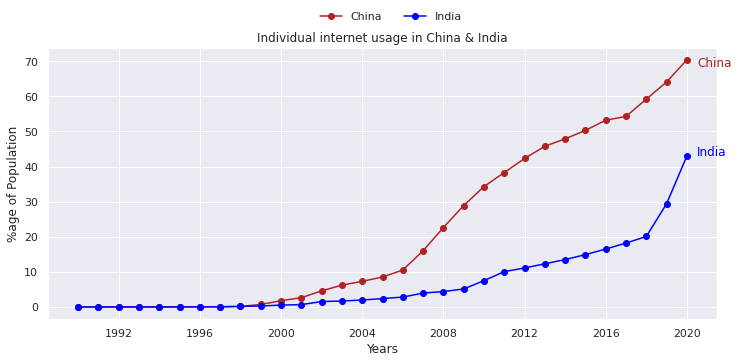

In [13]:
#Finally plotting the graph
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(china_india["China"],marker='o',label="China",c="firebrick")
ax.text(0.97,0.93,s="China",transform=ax.transAxes,c="firebrick")
ax.plot(china_india["India"],marker='o',label="India",c="blue")
ax.text(0.97,0.6,s="India",transform=ax.transAxes,c="blue")

ax.set_xlabel("Years")
ax.set_ylabel("%age of Population")
ax.set_title("Individual internet usage in China & India")
ax.legend(loc=(0.4,1.08),ncol=4,frameon=False)
#plt.savefig("SA.png")